In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
Dataset = pd.read_csv("Dataset.csv") #copy the path to your dataset

print(Dataset.head)
# importing an array of features
x = Dataset.iloc[:, :-1].values
# importing an array of dependent variable
y = Dataset.iloc[:, -1].values

<bound method NDFrame.head of    Country   Age   Salary Purchased
0   France  44.0  72000.0       No 
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0       No 
3    Spain  38.0  61000.0       No 
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0       No 
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0       No 
9   France  37.0  67000.0       Yes>


In [ ]:
print(x) # returns an array of features

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
print(x[:, 0:2])

[['France' 44.0]
 ['Spain' 27.0]
 ['Germany' 30.0]
 ['Spain' 38.0]
 ['Germany' 40.0]
 ['France' 35.0]
 ['Spain' nan]
 ['France' 48.0]
 ['Germany' 50.0]
 ['France' 37.0]]


In [ ]:
print(y) # viewing an array of the dependent variable.

['No ' 'Yes' 'No ' 'No ' 'Yes' 'Yes' 'No ' 'Yes' 'No ' 'Yes']


# Deleting the observation with the missing value(s)

>This technique works well on big datasets with few missing values. For instance, deleting a row from a dataset with hundreds of observations cannot affect the information quality of the dataset. However, this technique is not suitable for a dataset reporting many missing values. Deleting many rows from a dataset leads to the loss of information.

>To ensure no risk of losing crucial information, we need to make use of more appropriate techniques. The following technique involves the imputation of the missing data. Imputation means replacing the missing data with an estimated value.

>>**Mean Imputation**
Under this technique, we replace the missing value with the average of the variable in which it occurs. The advantage of this technique is that it preserves the mean and the sample size. However, this technique has some serious disadvantages.

>>Mean imputation underestimates the standard error, and it does not preserve the correlation among variables. The relationship among variables is an essential aspect of analysis as the study’s general objective is to understand it better.

>>Mean imputation is thus not an appropriate solution for missing data unless the data is missing completely at random (missing data is completely unrelated to both the missing data and observed values in the dataset).

>>**Hot Deck Imputation**
In this technique, we replace the missing value of the observation with a randomly selected value from all the observations in the sample that has similar values on other variables. Thus, this technique ensures that the imputing value is only selected from the possible interval where the actual value could probably fall, and is randomly selected rather than being determined, which is an essential aspect for a correct standard error.

>>**Cold Deck Imputation**
We replace the missing data using a value chosen from other variables with similar observation values in this technique. The difference between this technique and the Hot Deck imputation is that the selecting process of the imputing value is not randomized.

>>**Regression Imputation**
Regression imputation involves fitting a regression model on a feature with missing data and then using this regression model’s predictions to replace the missing values in this feature. This technique preserves the relationships between features, and this grants it a significant advantage over simple imputation techniques such as mean and mode imputation.

>>Regression imputation is of two categories:

>>>**Deterministic regression imputation**
>>>Deterministic regression imputation imputes the missing data with the exact value predicted from the regression model. This technique doesn’t consider the random variation around the regression line. Since the imputed values are exact, the correlation between the features and the dependent variables is overestimated.

>>>**Stochastic regression imputation**
In stochastic regression imputation, we add a random variation (error term) to the predicted value, therefore, reproducing the correlation of X and Y more appropriately.

Now that we know the techniques to take care of the missing values, let’s handle this problem in our dataset. We notice that our features set (x) has nan values in the Age and Salary columns.

We need to deal with this problem before we implement a machine learning model on our data. Since our dataset is small, we cannot eliminate a row reporting the missing value(s). Therefore, in our case, we shall make use of the mean imputation technique.



In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
my_dataset = [[1, 2], [np.nan, 3], [7, 6]]
imp.fit(my_dataset)
print(my_dataset)

[[1, 2], [nan, 3], [7, 6]]


In [ ]:
imp.transform(my_dataset)
print(imp.transform(my_dataset))

[[1. 2.]
 [4. 3.]
 [7. 6.]]


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
np.set_printoptions(suppress=True)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[20, 2], [np.nan, 4], [40, 6]])

X = [[np.nan, 2], [6, np.nan], [7, 6],[np.nan, np.nan]]

print(imp.transform(X))
# print(X)

[[30.  2.]
 [ 6.  4.]
 [ 7.  6.]
 [30.  4.]]


In [ ]:
# Importing the class called SimpleImputer from impute model in sklearn
from sklearn.impute import SimpleImputer
# To replace the missing value we create below object of SimpleImputer class
imputa = SimpleImputer(missing_values = np.nan, strategy = 'mean')
''' Using the fit method, we apply the `imputa` object on the matrix of our feature x.
The `fit()` method identifies the missing values and computes the mean of such feature a missing value is present.
'''
imputa.fit(x[:, 1:3])
# Repalcing the missing value using transform method
x[:, 1:3] = imputa.transform(x[:, 1:3])

In [ ]:
print(x) # returns an array of features

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


%.2f is a format string where % indicates the start of the format specifier, .2 specifies two decimal places, and f indicates a floating-point number.

In [ ]:
x[:, 2] = [ '%.2f' % elem for elem in x[:, 2] ]

In [ ]:
print(x)

[['France' 44.0 '72000.00']
 ['Spain' 27.0 '48000.00']
 ['Germany' 30.0 '54000.00']
 ['Spain' 38.0 '61000.00']
 ['Germany' 40.0 '63777.78']
 ['France' 35.0 '58000.00']
 ['Spain' 38.77777777777778 '52000.00']
 ['France' 48.0 '79000.00']
 ['Germany' 50.0 '83000.00']
 ['France' 37.0 '67000.00']]


# Encoding categorical data
During encoding, we transform text data into numeric data. Encoding categorical data involves changing data that fall into categories to numeric data.

The Country and the Purchased columns of our dataset contain data that fall into categories. Since machine learning models are based on a mathematical equation, which takes only numerical inputs, it is challenging to compute the correlation between the feature and the dependent variables. To ensure this does not happen, we need to convert the string entries in the dataset into numbers.

For our dataset, we shall encode France into 0, Spain into 1, and Germany into 2. However, our future machine learning model interprets the numerical order between 0 for France, 1 for Spain, and 2 for Germany do matter, which is not the case. To ensure this misinterpretation does not occur, we make use of one-hot encoding.

One-hot encoding converts our categorical Country column into three columns. It creates a unique binary vector for each country such that there is no numerical order between the country categories.

Let’s see how One-hot encoding enables us to achieve this by executing the code below:



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

NameError: name 'np' is not defined

In [ ]:
# executing the cell we obtain:
print(x)

[[1.0 0.0 0.0 44.0 '72000.00']
 [0.0 0.0 1.0 27.0 '48000.00']
 [0.0 1.0 0.0 30.0 '54000.00']
 [0.0 0.0 1.0 38.0 '61000.00']
 [0.0 1.0 0.0 40.0 '63777.78']
 [1.0 0.0 0.0 35.0 '58000.00']
 [0.0 0.0 1.0 38.77777777777778 '52000.00']
 [1.0 0.0 0.0 48.0 '79000.00']
 [0.0 1.0 0.0 50.0 '83000.00']
 [1.0 0.0 0.0 37.0 '67000.00']]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
x_label_encoding = Dataset.iloc[:, :-1].values

x_label_encoding[:, 0] = labelencoder.fit_transform(x_label_encoding[:, 0])

In [ ]:
# executing the cell we obtain:
print(x_label_encoding)

[[0 44.0 72000.0]
 [2 27.0 48000.0]
 [1 30.0 54000.0]
 [2 38.0 61000.0]
 [1 40.0 nan]
 [0 35.0 58000.0]
 [2 nan 52000.0]
 [0 48.0 79000.0]
 [1 50.0 83000.0]
 [0 37.0 67000.0]]


In [ ]:
print(y)

['No ' 'Yes' 'No ' 'No ' 'Yes' 'Yes' 'No ' 'Yes' 'No ' 'Yes']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state= 1)

In [ ]:
print(x_train)

[[0.0 0.0 1.0 38.77777777777778 '52000.00']
 [0.0 1.0 0.0 40.0 '63777.78']
 [1.0 0.0 0.0 44.0 '72000.00']
 [0.0 0.0 1.0 38.0 '61000.00']
 [0.0 0.0 1.0 27.0 '48000.00']
 [1.0 0.0 0.0 48.0 '79000.00']
 [0.0 1.0 0.0 50.0 '83000.00']
 [1.0 0.0 0.0 35.0 '58000.00']]


In [ ]:
print(x_test)

[[0.0 1.0 0.0 30.0 '54000.00']
 [1.0 0.0 0.0 37.0 '67000.00']]


In [ ]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [ ]:
print(y_test)

[0 1]


# Feature scaling
In most cases, we shall work with datasets whose features are not on the same scale. Some features often have tremendous values, and others have small values.

Suppose we implement our machine learning model on such datasets. In that case, features with tremendous values dominate those with small values, and the machine learning model treats those with small values as if they don’t exist (their influence on the data is not be accounted for). To ensure this is not the case, we need to scale our features on the same range, i.e., within the interval of -3 and 3.

Therefore, we shall only scale the Age and Salary columns of our x_train and x_test into this interval. The code below enables us to achieve this.



# Numerical Data Scaling Methods


Both normalization and standardization can be achieved using the scikit-learn library.

Let’s take a closer look at each in turn.

***Attributes are often normalized to lie in a fixed range — usually from zero to one—by dividing all values by the maximum value encountered or by subtracting the minimum value and dividing by the range between the maximum and minimum values.***

A value is normalized as follows:

$$ y = \frac{x - \text{min}}{\text{max} - \text{min}} $$

Where the minimum and maximum values pertain to the value \( x \) being normalized.

For example, for a dataset, we could guesstimate the min and max observable values as 30 and -10. We can then normalize any value, like 18.8, as follows:

$$ y = \frac{x - \text{min}}{\text{max} - \text{min}} $$

$$ y = \frac{18.8 - (-10)}{30 - (-10)} $$

$$ y = \frac{28.8}{40} $$

$$ y = 0.72 $$


In [ ]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[100.      0.001]
 [  8.      0.05 ]
 [ 50.      0.005]
 [ 88.      0.07 ]
 [  4.      0.1  ]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# we only apply the feature scaling on the features other than dummy variables.
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])
x_test[:, 3:] = sc.fit_transform(x_test[:, 3:])

In [ ]:
print(x_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259664122196]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013151011913539]
 [1.0 0.0 0.0 0.566708506533324 0.6335624099933242]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786619702972484]
 [0.0 0.0 1.0 -1.9018011447007988 -1.4204636416933283]
 [1.0 0.0 0.0 1.1475343068237058 1.2326533417352645]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910170163732]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194534905564]]


In [ ]:
print(x_test)

[[0.0 1.0 0.0 -1.0 -1.0]
 [1.0 0.0 0.0 1.0 1.0]]


# Data Standardization

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

This can be thought of as subtracting the mean value or centering the data.

Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.

Subtracting the mean from the data is called centering, whereas dividing by the standard deviation is called scaling. As such, the method is sometime called “**center scaling**“.

A value is standardized as follows:

$$ y = \frac{x - \text{mean}}{\text{standard\_deviation}} $$

Where the mean is calculated as:

$$ \text{mean} = \frac{\sum x}{\text{count}(x)} $$

And the standard deviation is calculated as:

$$ \text{standard\_deviation} = \sqrt{\frac{\sum (x - \text{mean})^2}{\text{count}(x)}} $$

We can guesstimate a mean of 10.0 and a standard deviation of about 5.0. Using these values, we can standardize the first value of 20.7 as follows:

$$ y = \frac{x - \text{mean}}{\text{standard\_deviation}} $$

$$ y = \frac{20.7 - 10}{5} $$

$$ y = \frac{10.7}{5} $$

$$ y = 2.14 $$

The mean and standard deviation estimates of a dataset can be more robust to new data than the minimum and maximum.


In [ ]:
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = asarray([[10000, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[100.      0.001]
 [  8.      0.05 ]
 [ 50.      0.005]
 [ 88.      0.07 ]
 [  4.      0.1  ]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


In [ ]:
t = []
for item in scaled:
  t.append(item[1])

In [ ]:
print((sum(t)/len(t)))

-4.4408920985006264e-17


In [ ]:
import statistics

print((statistics.mean(t)))
print((statistics.stdev(t)))

-3.8857805861880476e-17
1.118033988749895


# Another example

# About Standardization

The result of **standardization** (or **Z-Score normalization**) is that the features will be re scaled so that they'll have the properties of a standard normal distribution with:
$$\mu = 0$$
And
$$\sigma = 1$$

Where $\mu$ is the mean(average) and $\sigma$ is the standard deviation from the mean; standard scores (also called **Z** scores) of the sampels are calculated as follows:
$$z = \frac{x - \mu}{\sigma}$$

Standardizing the features so that they are centered around $0$ with a standard deviation of $1$ is not only important if we are computing measurements that have different units, but it is also a general requirement for many machine learning algorithms. Intuitively, we can think of gradient descent as a prominent example (an optimization algorithm) often used in:

- `Logistic Regression`
- `Support Vector Machine`
- `Perceptrons`
- `Neural Network`

with features being on different scales, certain weights may update faster than others since the feature values $x_j$ play a role in the weight updates:
$$\Delta w_j = -\eta \frac{\partial J}{\partial w_j} = \eta \sum_i (t^{i} - o^{i})x_j^{i}$$

So that $w_j := w_j + \Delta w_j$, where $\eta$ is the learning rate, $t$ the target class label, and $o$ the actual output. Other intuitive examples include:

- `K_Nearest Neighbor`
- `Clustering`

Alorithms that use, for example: `Euclidean Distance Measures` - in fact, `tree-based` classifier are probably the only classifiers where feature scaling doesn't make a difference.

In fact, the only family of algorithms that I could think of being scale-invariant are `tree-based` method.

Let's take a general `CART Dicision Tree` algorithm. Without going into much depth regarding information gain and impurity measures, we can think of the decision as `is feature x_i >= some_value`? Intuitively, wen can see that it really doesn't matter on which scale this feature is.

Some examples of algorithms where feature scaling matters are:

- `k-nearest neighbors` with `Euclidean Distance` measure if want all features to contribute equally.
- `k-means` similar to `k-nearest neighbors`
- `LinearRegression`, `LogisticRegression`, `Support Vector Machine`, `Perceptrons`, `Neural Networks` as long as it using Gradient Descent Optimization.
- `Linear Discriminant Analysis(LDA)`, `Princial Component Analysis(PCA)`, as long as it want to find directions of maximizing the variance (under the constraints that those directions/`eigenvectors`/`Principal Components` are orthogonal); you want to have features on the same scale since you'd emphasize variables on "larger measurement scales" more.

In addition, we'd also want to think about whether we want to **Standardize** or **Normalize**(here: scaling to `[0, 1]` range) our data. Some algorithms assume that our data is centered at `0`. For example, if we initialize the weights of a small multi-layer perceptron with `tanh` activation units to `0` or small random values centered around zero, we want to update the model weights **equally**. As a rule of thumb: _When in doubt, just standardize the data, it shouldn't hurt_
***

# About Min-Max scaling

An alternative approach to **Z-Score** normalization (or called standardization) is the so-called **Min-Max Scaling** (often also simply called **Normalization** - a common cause for ambiguities)

In this approach, the data is scaled to a fixed range - usually `[0, 1]`.
The cost of having this bounded range - in contrast to standrdization - is that we will end up with smaaller standard deviations, which can suppress the effect of outliers.

**Note**:

If the dataset have lot's of outliers, and the algorithms are sensitive to outliers, please use `Min-Max Scaler`

A `Min-Max Scaling` is typically done via the foloowing equation:

$$X_{norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$$

$X_i$ is the $i^{th}$ sample of dataset.


# Z-Score Standardization or Min-Max Scaling

"Standardization or Min-Max scaling"? - There is no obvious answer to this question: it really depends on the application.

For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is the `Principal Component Analysis`, where we usually prefer `Standardization` over `Min-Max Scaling`, since we are interested in the components that maximize the variance(depending on the question and if the PCA computes the components via the correaltion matrix instead of the covariance matrix)

However this doesn't mean that `Min-Max Scaling` is not useful at all, A popular application is `image processing`, where pixel intensities have to be normalized to fit withint a certain range (i.e., `[0, 255]` for the RGB colour range). Also, typical _Neural Network_ Algorithm require data that on a `0 - 1` scale.

# Standardizing and Normalizing - How it can be done using `scikit-learn`

Of course, we could make use of NumPy's vectorization capabilities to calculate the `Z-Score` for standardization and normalize the data using the equations that were mentioned in the previous sections. However, there is even more convenient aapproach using the preprocessing module from one of Python's open-source maachine learning library [scikit-learn](http://scikit-learn.org/)

For the following examples anad discussing, we will have a look at free `Wine` Dataset that is deposited on the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)

> Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

> Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The `Wine` dataset consists of `3` different classes where each row correspond to aa particular wine sample.

The class label `(1, 2, 3)` are listed in the `1st` column, and the columns `2 - 14` correspond to `13` different attributes(features):

- Alcohol
- Malic Acid
-
...

## Loading the wine dataset

In [1]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

df = pd.read_csv(url, header=None, usecols=[0, 1, 2])
df.columns = ['Label', 'Alcohol', 'MalicAcid']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      178 non-null    int64  
 1   Alcohol    178 non-null    float64
 2   MalicAcid  178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [ ]:
df.head()

,Label,Alcohol,MalicAcid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


from matplotlib import pyplot as plt
_df_0['Alcohol'].plot(kind='hist', bins=20, title='Alcohol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MalicAcid'].plot(kind='hist', bins=20, title='MalicAcid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Alcohol', y='MalicAcid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Label']
  ys = series['Alcohol']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Label')
_ = plt.ylabel('Alcohol')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Label']
  ys = series['MalicAcid']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Label')
_ = plt.ylabel('MalicAcid')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Label'}, axis=1)
              .sort_values('Label', ascending=True))
  xs = counted['Label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['Alcohol'].plot(kind='line', figsize=(8, 4), title='Alcohol')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['MalicAcid'].plot(kind='line', figsize=(8, 4), title='MalicAcid')
plt.gca().spines[['top', 'right']].set_visible(False)

As we can see in the table above, the features **Aalcohol**(per cent/Volume) and **Malic Acid**(g/l) are meaasured on different scales, so that **Feature Scaling** is necessary important perior to any comparison or combination of these data.

## Standardization and Min-Max Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

standard_scale = StandardScaler()
df_stdScale = standard_scale.fit_transform(df[['Alcohol', 'MalicAcid']])
df_stdScale[:5]


array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

In [ ]:
minmax_scale = MinMaxScaler()
df_minmax = minmax_scale.fit_transform(df[['Alcohol', 'MalicAcid']])
df_minmax[:5]

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265]])

In [ ]:
print(np.mean(df_stdScale[:,0]))
print(np.std(df_stdScale[:,0]))
print(np.mean(df_stdScale[:,1]))
print(np.std(df_stdScale[:,1]))

-8.382807556720283e-16
1.0
-1.197543936674326e-16
1.0


In [ ]:
print(f"The mean of Standard Scaling: {np.mean(df_stdScale):.2f}")
print(f"The Standard Deviation of Standard Scaling: {np.std(df_stdScale):.2f}")

The mean of Standard Scaling: -0.00
The Standard Deviation of Standard Scaling: 1.00


In [ ]:
print(f"The min of Min-Max Scaling: {df_minmax.min():.2f}")
print(f"The max of Min-Max Scaling: {df_minmax.max():.2f}")
print(f"The mean of Min-Max Scaling: {np.mean(df_minmax):.2f}")
print(f"The Standard Deviation of Min-Max Scaling: {np.std(df_minmax):.2f}")

The min of Min-Max Scaling: 0.00
The max of Min-Max Scaling: 1.00
The mean of Min-Max Scaling: 0.42
The Standard Deviation of Min-Max Scaling: 0.24


## Plotting

In [ ]:
%matplotlib inline

from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))
    plt.scatter(df['Alcohol'], df['MalicAcid'],
                color='green', label='Input Scale', alpha=0.5)
    plt.scatter(df_stdScale[:, 0], df_stdScale[:, 1],
                color='red', label='Standardized [mean=0, std=1]', alpha=0.3)
    plt.scatter(df_minmax[:, 0], df_minmax[:, 1], label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

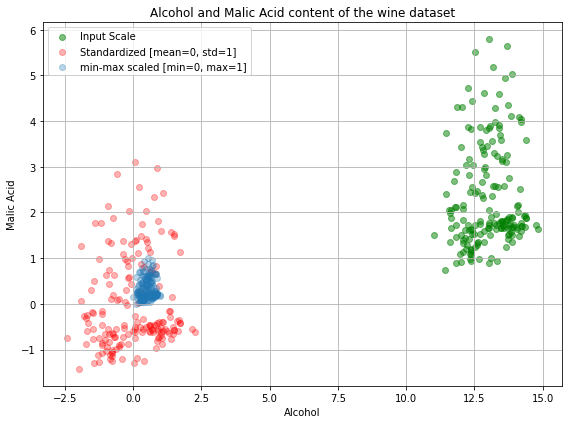

In [ ]:
plot()

The plot above includes the wine datapoints on all `3` different scale:
- **Input Scale** Original Input Scale
- **Standardized** Using `sklearn` `StandardScaler`
- **min-max scaled** Using `sklearn` `MinMaxScaler`

Next Plot we will zoom in each of `3` scale to see the label distribution, they should have the same location/distribution, but just the difference of scale

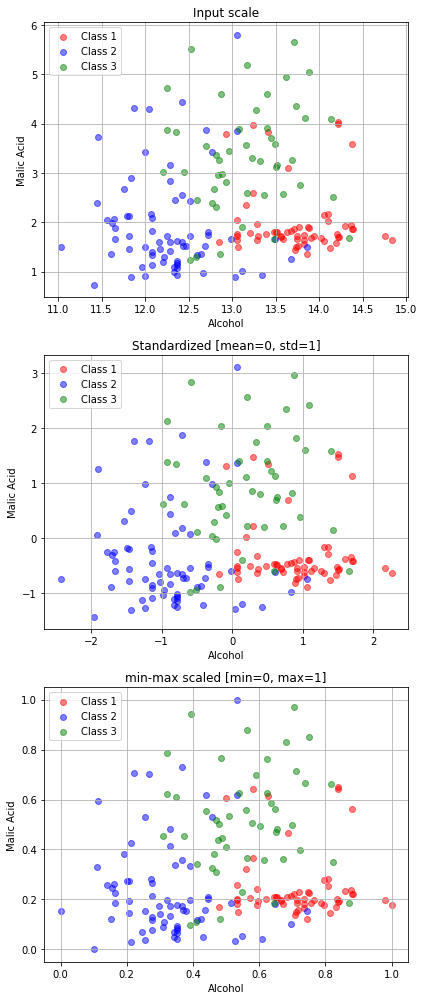

In [ ]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'MalicAcid']].values, df_stdScale, df_minmax),
               ('Input scale',
                'Standardized [mean=0, std=1]',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Label'].values == i, 0],
                  d[df['Label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()
plt.show()

# Bottom-up Approaches

We can also code the equations for standardization and `[0, 1]` Min-Max scaling _Manually_. However, the scikit-learn methods are still useful if you are working with test and training data sets and want to scale them equally.

```python
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
```

Here we try to perform the computation using native Python code, and more convenient `NumPy` solution, which is especially useful if we attempt to transform the whole matrix.

Recall the equations:

- **Standardization**:
$$z = \frac{x - \mu}{\sigma}$$

- **Mean:**
$$\mu = \frac{1}{N}\sum_{i=1}^{N}(x_i)$$

- **Standard Deviation:**
$$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^2}$$

- **Min-Max Scaling:**
$$X_{norm} = \frac{X_i - X_{min}}{X_{max} - X_{min}}$$

***


# The effect of standardization on PCA in a pattern classification task


Previous chapter we have mentioned the `Principal Component Analysis(PCA)` as an example where standardization is crucial, since it is _analyzing_ the variances of the different features. Now, let's see how the standardization affects `PCA` and a following supervised classification on the whole wine dataset.

We will go through the following steps:

- `read_csv` the whole dataset
- `train_test_split` split the dataset into `training` set and `testing` set.
- Standardization the features
- `PCA` to reduce dimensionality
- Train a classifier
- Evaluate the performance **with** and **without** standardization.

## Read full dataset
***

In [ ]:
df = pd.read_csv(url, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Spliting the dataset into `train` set and `test` set

We will use `sklearn`'s `train_test_split` function to randomly split the wine dataset into `training` set and `test` set where the `training` set will contain `70%` of the samples and the `test` set will contain `30%` respectively.
***

In [ ]:
from sklearn.model_selection import train_test_split

X = df.values[:, 1:]
y = df.values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
print(f"The shape of X_train is: {X_train.shape}")
print(f"The shape of X_test is {X_test.shape}\n")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is {y_test.shape}")

The shape of X_train is: (124, 13)
The shape of X_test is (54, 13)

The shape of y_train is: (124,)
The shape of y_test is (54,)


## Feature Scaling -- Standardization
***

In [ ]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

## Dimensionality reduction via Principal Component Analysis(PCA)

Now, we perform PCA on the `standardized` and the `non-standardized` datasets to transform the dataset onto a **2-dimensional** feature subspace.

In a real application, a procedure like cross-validation would be done in order to find out what choice of features would yield a optimal balance between **Preserving Information** and **Overfitting** for different classfiers. However, we will omit this step since we don't want to train a perfect classifier here, but merely compare the effects of `standardization`.

In [ ]:
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


# on standardized data
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

In [ ]:
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.99842356 0.00141937]

 Total Variance Explained: 99.98


We can see that our first two principal components explain the majority of the variance in this dataset (99.98%)! This is an indication of the total information represented compared to the original data.

## Summary
The key takeaways from this article are:

PCA is a commonly used **dimension reduction** technique.

The goal of PCA is to simply your model features into fewer, uncorrelated features to help visualize patterns in your data and help it run faster.

Only apply PCA to continuous data.

Make sure your data is `normalized` before applying PCA!!

Let us quickly visualize how our new feature subspace looks like (note that class labels are not considered in a PCA - in contrast to a Linear Discriminant Analysis - but I will add them in the plot for clarity).

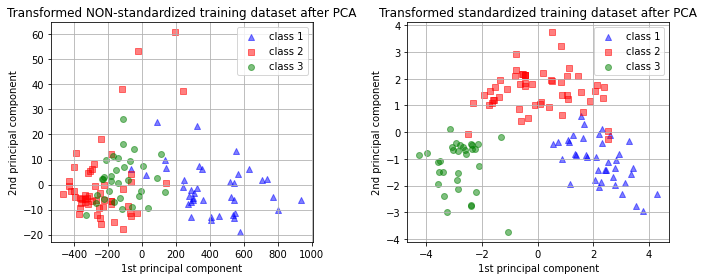

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')
ax2.set_title('Transformed standardized training dataset after PCA')

for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()

Before we train a classifier to classifi the class, we can see clearly from the plot that, on the left, the `training` set **without Standardization** , would be difficult to find the decision boundary. But on the right, the `training` set **with Standardization**, the decision boundary is much clearer than left one.

## Train a naive Bayes Classifier

We will use a naive Bayes classifier for the classification task. If you not familiar with it, the term **naive** comes from the assumption that all features are **independent** with no interference at all, which almost impossible in real-world.
it works based on Bayes' Rule:

$$P(w_j | x) = \frac{p(x | w_j) \times P(w_j)}{p(x)}$$

where:

- $w$: class label.
- $P(w|x)$: posterior probability
- $p(x|w)$: prior probability (or likelihood)

And the **Decesion Rule:**

$$w_1$$ if $$P(w_1|x) > P(w_2|x)$$ else $$w_2$$

$$=\frac{p(x|w_1) \times P(w_1)}{p(x)} > \frac{p(x|w_2) \times P(w_2)}{p(x)}$$

In [ ]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# on standardized data
gnb_std = GaussianNB()
gnb_std.fit(X_train_std, y_train)

GaussianNB()

In [ ]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset without Standardization')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset without Standardization')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset without Standardization
81.45%

Prediction accuracy for the test dataset without Standardization
64.81%



In [ ]:
pred_train_std = gnb_std.predict(X_train_std)

print('\nPrediction accuracy for the training dataset with Standardization')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std)))

pred_test_std = gnb_std.predict(X_test_std)

print('\nPrediction accuracy for the test dataset with Standardization')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset with Standardization
96.77%

Prediction accuracy for the test dataset with Standardization
98.15%



## Other Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

clf_std = DecisionTreeClassifier()
clf_std.fit(X_train_std, y_train)

DecisionTreeClassifier()

In [ ]:
pred_train_clf = clf.predict(X_train)
print(f"\nPrediction accuracy for the training dataset without Standardization")
print(f"{metrics.accuracy_score(y_train, pred_train_clf):.2%}")


Prediction accuracy for the training dataset without Standardization
100.00%


In [ ]:
pred_train_clf_test = clf.predict(X_test)
print("\nPrediction accuracy for the test dataset without Standardization")
print(f"{metrics.accuracy_score(y_test, pred_train_clf_test):.2%}")


Prediction accuracy for the test dataset without Standardization
66.67%


In [ ]:
pred_train_clf_std = clf_std.predict(X_train_std)
print('\nPrediction Accuracy for the training dataset with Standardization')
print(f"{metrics.accuracy_score(y_train, pred_train_clf_std):.2%}")


Prediction Accuracy for the training dataset with Standardization
100.00%


In [ ]:
pred_train_clf_std_test = clf_std.predict(X_test_std)
print('\nPrediction Accuracy for the test dataset with Standardization')
print(f"{metrics.accuracy_score(y_test, pred_train_clf_std_test):.2%}")


Prediction Accuracy for the test dataset with Standardization
96.30%


In [ ]:
pip install ucimlrepo

In [ ]:

from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

As we can see, the standardization prior to the PCA definitely led to an decrease in the empirical error rate on classifying samples from test dataset.

In **Naive Bayes** Classifier, before **Standardization** classifier after `PCA` perform to around $64.81\%$ accuracy, after **Standardization**, performance increase to $98.15\%$

Similar to `DecesionTreeClassifier`, test set performance increase from $68.52\%$ to $96.30\%$

# References:
https://colab.research.google.com/github/JL1829/turbo-funicular/blob/master/_notebooks/2020-09-19-About%20Feature%20Scaling%20and%20Normalization.ipynb#scrollTo=8taXh5oVnqIB